# Dataset e Pre-elaborazione dei Dati

## _Apprendimento Automatico_ | LM in *Data Science*

##      

da doc. Scikit-learn + Python Machine Learning - Code Examples | Ch. 2-4

# Dataset in Scikit-learn

## [<tt>sklearn.dataset</tt>](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

+ **dataset loader** per _caricare_ piccoli dataset standard (_toy dataset_)
+ **dataset fetcher** per _prelevare dalla rete_ dataset più grandi (_real world dataset_)
    - in entrambi i casi vengono restituiti oggetti `Bunch` con 2 elementi (almeno): <br> un array di shape `n_samples * n_features` con chiave  `data` e<br> un array numpy di lunghezza `n_samples`, con i valori di output, la cui chiave è `target`
        - oggetto `Bunch` dizionario che espone chiavi e attributi
    - si può richiedere alle funzioni di caricamento di restituire una tupla contenente solo gli array, impostando il parametro `return_X_y` a `True`
    - i dataset contengono descrizioni complete nell'attributo `DESCR` 
        * si vedano anche `feature_names` e `target_names`
+ **dataset generation** funzioni per _generare_ dataset sintetici controllati (_generated dataset_)
    - producono tuple `(X, y)`, con `X` array numpy `n_samples * n_features` e `y` array di lunghezza `n_samples` 

Sono disponibili anche altre modalità di caricamento di dataset in [altri formati](https://scikit-learn.org/stable/datasets/loading_other_datasets.html#loading-other-datasets)

## Dataset Giocattolo / Toy dataset

Piccoli dataset standard già presenti in scikit-learn 
+ utili a illustrare il comportamento degli algoritmi [[doc](https://scikit-learn.org/stable/datasets/toy_dataset.html)]


| funzioni | _dataset_ |
|:-----|:--|
| `load_boston(*[, return_X_y])` | _boston house-prices_ (regressione) *DEPRECATO* |
| `load_iris(*[, return_X_y, as_frame])` | _iris_ (classificazione) |
| `load_diabetes(*[, return_X_y, as_frame])` | _diabetes_ (regressione) |
| `load_digits(*[, n_class, return_X_y, as_frame])` | _digits_ (classificazione) |
| `load_linnerud(*[, return_X_y, as_frame])` | _linnerud_ physical excercise |
| `load_wine(*[, return_X_y, as_frame])` | _wine_ (classificazione) |
| `load_breast_cancer(*[, return_X_y, as_frame])` | _breast cancer wisconsin_ (classificazione) |

## Dataset Real World

Per caricare dataset di dimensioni più grandi, se necessario dalla rete 
+ caricabili tramite le seguenti funzioni: [[doc](https://scikit-learn.org/stable/datasets/real_world.html)]


| funzioni | _dataset_ |
|:-----|:-----|
|`fetch_olivetti_faces(*[, data_home, …])` | _Olivetti faces_ di AT&amp;T (classificazione)
|`fetch_20newsgroups(*[, data_home, subset, …])` | filename e dati di _20 newsgroups_ (classificazione)
|`fetch_20newsgroups_vectorized(*[, subset, …])` | _20 newsgroups_ in forma vettoriale (classificazione)
|`fetch_lfw_people(*[, data_home, funneled, …])` | _Labeled Faces in the Wild (LFW)_ persone (classificazione)
|`fetch_lfw_pairs(*[, subset, data_home, …])` | _Labeled Faces in the Wild (LFW)_ coppie (classificazione)
|`fetch_covtype(*[, data_home, …])` | _covertype_ (classificazione)
|`fetch_rcv1(*[, data_home, subset, …])` | _RCV1_ multilabel (classificazione)
|`fetch_kddcup99(*[, subset, data_home, …])` | _kddcup99_  (classificazione)
|`fetch_california_housing(*[, data_home, …])` | _California housing_ (regressione)

## Generatori di dataset

Vari generatori _casuali_ di campioni per _dataset artificiali_ di dimensioni e complessità controllate

+ per la _classificazione e il clustering_
+ per la _regressione_
+ per il _manifold learning_
+ per la _decomposizione_

## Generatori per la classificazione e il clustering

Generatori che producono una matrice di feature e un vettore di valori di output discreti

+ dataset a *Singola etichetta*
+ dataset *Multilabel*
+ dataset *Biclustering*

### Singola etichetta

+ `make_blobs` e `make_classification` creano _dataset multiclasse_ allocando per ogni classe uno o più cluster di punti con _distribuzione normale_ 
    - `make_blobs` permette un maggiore controllo su centri e dev. standard dei cluster<br> (usato per il clustering)
    - `make_classification` specializzata nell'introduzione di _rumore_ mediante 
        - feature correlate, ridondanti e non informative; 
        - più cluster gaussiani per classe; 
        - trasformazioni lineari dello spazio delle feature 
+ `make_gaussian_quantiles` divide un singolo cluster gaussiano in _classi_ pressoché delle stesse dimensioni separate da _ipersfere concentriche_ 
+ `make_hastie_10_2` genera un _problema binario_ _10_-dimensionale simile al precedente

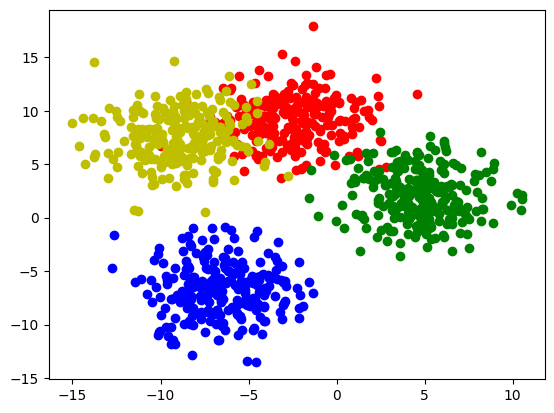

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=4, 
                  cluster_std=2.3, random_state=42)
plt.figure(1)
colori = ['r', 'g', 'b', 'y']
for i, col in enumerate(colori):
    dati = y == i # filtra i dati del cluster
    plt.scatter(X[dati, 0], X[dati, 1], c=col)
plt.show()

### ..Singola Etichetta


+ `make_circles` e `make_moons` generano dataset 2d per _classificazione binaria_ utili alla visualizzazione 
    - risultano sfidanti per certi algoritmi (ad es. clustering basato su centroidi o classificazione lineare), includendo opzionalmente _rumore_ gaussiano
    - `make_circles` produce dati gaussiani con un _confine_ di decisione _sferico_ per la _classificazione binaria_ [[doc ed esempi]](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)

    - `make_moons` produce due _semicerchi_ che si sovrappongono [[doc ed esempi]](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)
    
    ![](https://scikit-learn.org/stable/_images/sample_generators-4.png)


### Dataset per classificazione multilabel (testo)

`make_multilabel_classification` genera campioni casuali con etichette multiple che riflettono _bag of word_ tratte da mix di _topic_ (<span style="font-style:italic;">argomenti</span>) [[doc ed esempi](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_multilabel_classification.html#sklearn.datasets.make_multilabel_classification)]

+ numero di topic per ogni documento tratto da una Poisson
    - e topic tratti da una distribuzione prefissata 
+ similarmente, numero di parole tratto da una Poisson
    - con parole tratte da una multinomiale: ogni topic definisce una  distribuzione sulle parole 
+ semplificazioni sui mix di bag-of-word:
    - distribuzioni delle parole per-topic estratte in modo indipendente, in realtà correlate: tutte influenzate da una distribuzione di base sparsa 
    - per un documento generato da più topic, tutti i topic pesati egualmente nella generazione delle bag of word
    - documenti senza etichette e parole casuali, non tratte da una distribuzione di base

### Multilabel | Esempio

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_random_multilabel_dataset_001.png)

### Biclustering

Tecnica di clustering simultaneo di righe e colonne di una matrice [[doc ed esempi](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_biclusters.html#sklearn.datasets.make_biclusters)]
+ si generano *bicluster*:<br> sottoinsiemi di righe che esibiscono comportamenti simili su sottoinsiemi di colonne, o viceversa

| _funzione_ | dataset |
|:-----------|:----------|
|`make_biclusters(shape, n_clusters, *[, …])` | array con una struttura constante a blocchi diagonali |
|`make_checkerboard(shape, n_clusters, *[, …])` | array con una struttura a blocchi disposti a scacchiera |

## Generatori per la regressione..

`make_regression` produce dataset per problemi di regressione come combinazione lineare casuale, opzionalmente sparsa, di feature casuali, con rumore [[doc ed esempi](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)]
- le sue feature informative potrebbero essere non correlate,<br> o _low rank_ (poche feature responsabili per la totalità della varianza)

## ..Generatori per la regressione

Altri generatori per la regressione pruducono funzioni in modo deterministico a partire da feature randomizzate 

+ `make_sparse_uncorrelated` produce un target come combinazione lineare di 4 feature coefficienti prefissati [[doc](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_sparse_uncorrelated.html#sklearn.datasets.make_sparse_uncorrelated)]
+ altre funzioni codificano esplicitamente relazioni non lineari: 
    - `make_friedman1` relativa a trasformazioni polinomiali o seno; 
    - `make_friedman2` include la moltiplicazione delle feature e la reciprocità; 
    - `make_friedman3` simile ma con una transformazione tramite $\mathrm{arctan}$ sulla feature target

## Generatori per il manifold learning

| _funzione_ | obiettivo |
|:-----------|:----------|
|`make_s_curve([n_samples, noise, random_state])` | Genera un dataset a _forma di S_ [[doc ed esempi](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html#sklearn.datasets.make_s_curve)] |
|`make_swiss_roll([n_samples, noise, random_state])` | Generate un dataset _swiss roll_  [[doc ed esempi](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html#sklearn.datasets.make_swiss_roll)]|



![](https://scikit-learn.org/stable/_images/sphx_glr_plot_ward_structured_vs_unstructured_001.png)

## Generatori per la decomposizione delle matrici

`sklearn.decomposition` [[doc](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)]

| funzione | _dataset_ |
|:-----------|:----------|
|`make_low_rank_matrix([n_samples, …])` | matrice _low rank_ con valori singolari a forma di campana |
|`make_sparse_coded_signal(n_samples, *, …)` | matrice _segnale_ come combinazione sparsa di  elementi dizionario |
|`make_spd_matrix(n_dim, *[, random_state])` | matrice _simmetrica_, _positiva-definita_ casuale |
|`make_sparse_spd_matrix([dim, alpha, …])` | matrice _sparsa simmetrica definita positiva_ |

## Esempio | Caricamento IRIS

In [2]:
import os
import pandas as pd

# locale
# df = pd.read_csv('iris.data', header=None, encoding='utf-8')

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Visualizzazione dei dati**

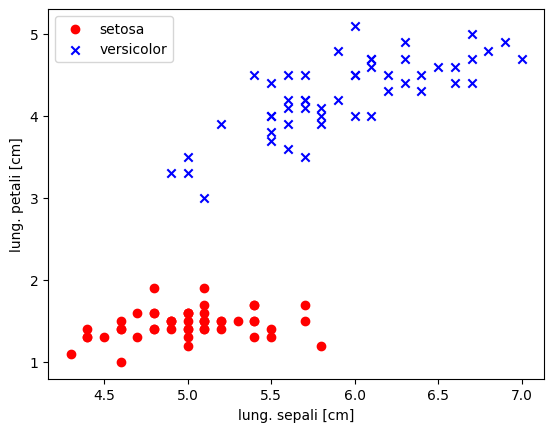

In [3]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# seleziona setosa e versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# estrae sepal length e petal length
X = df.iloc[0:100, [0, 2]].values
# visualizzazione dati
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('lung. sepali [cm]')
plt.ylabel('lung. petali [cm]')
plt.legend(loc='upper left')
plt.show()

metodo `DataFrame`.[`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) di Pandas
- localizzazione basata su indici interi

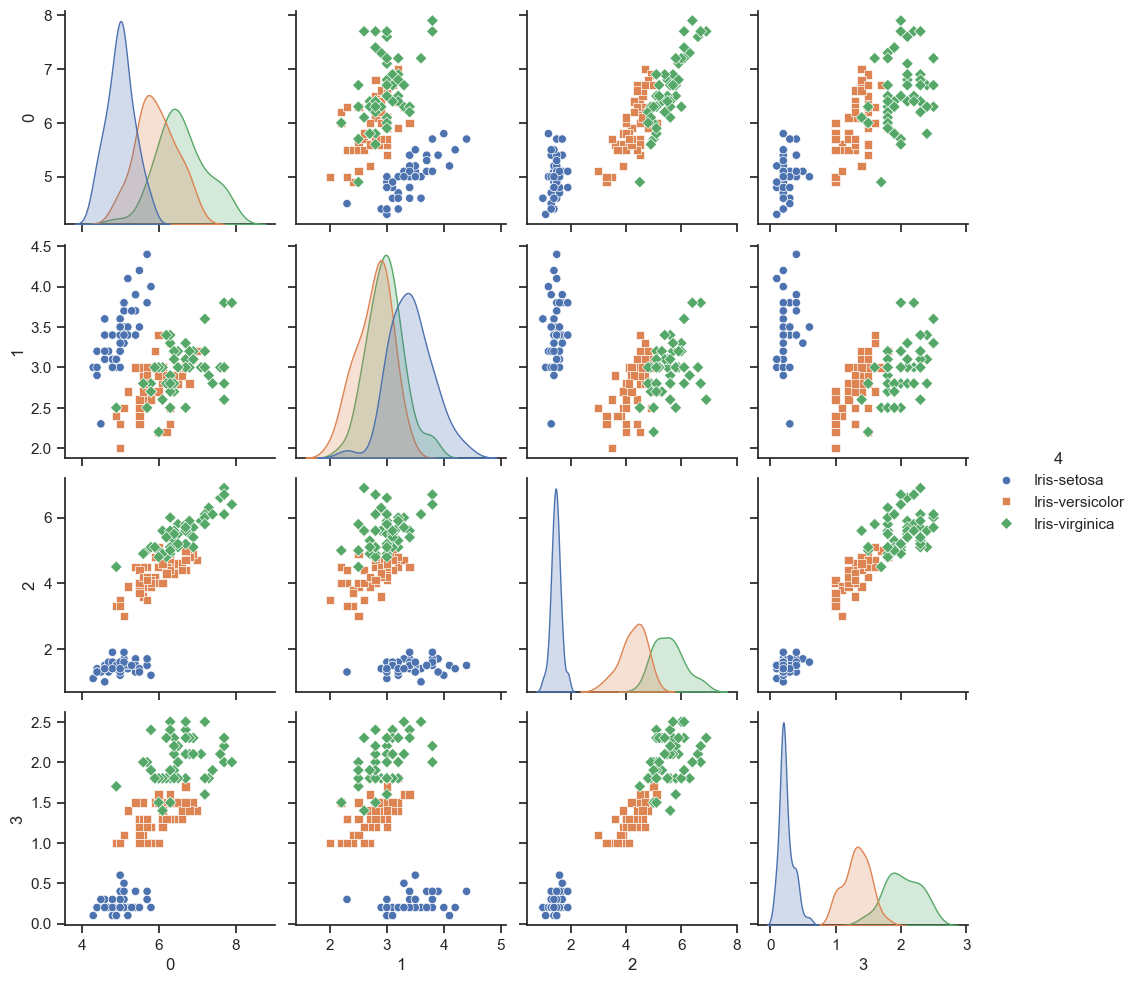

In [4]:
import seaborn as sns
import pandas as pd
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue=4, markers=["o", "s", "D"])

## Esempio | Caricamento dataset Iris interno

In [5]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Etichette delle Classi:', np.unique(y))


Etichette delle Classi: [0 1 2]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
print('conteggio etichette in y:', np.bincount(y))
print('conteggio etichette in y_train:', np.bincount(y_train))
print('conteggio etichette in y_test:', np.bincount(y_test))

conteggio etichette in y: [50 50 50]
conteggio etichette in y_train: [35 35 35]
conteggio etichette in y_test: [15 15 15]


In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_test_std.T

array([[ 0.89820289, -1.16537974, -1.33269725,  0.39625036,  0.34047786,
         0.11738784,  1.12129291,  0.39625036,  0.84243039, -1.38846976,
        -1.27692475,  0.61934037, -1.33269725, -0.27301968, -1.33269725,
         0.56356787,  0.73088538,  0.39625036,  0.28470535,  0.78665788,
         1.17706541, -1.33269725,  0.34047786,  0.61934037,  0.22893285,
         0.50779537, -0.4403372 ,  1.0655204 , -1.22115225,  0.67511288,
        -1.22115225, -1.33269725,  0.11738784,  0.11738784,  1.40015543,
         0.9539754 , -1.33269725, -1.22115225, -1.33269725,  0.50779537,
         1.0655204 ,  0.73088538,  0.45202286, -1.27692475, -1.27692475],
       [ 1.44587881, -1.04507821, -1.17618121,  0.65926081,  0.2659518 ,
         0.1348488 ,  0.79036381,  0.3970548 ,  0.92146681, -1.04507821,
        -1.04507821,  0.79036381, -1.30728421, -0.2584602 , -1.30728421,
         0.2659518 ,  1.44587881,  0.3970548 ,  0.1348488 ,  1.05256981,
         1.18367281, -1.43838721,  0.2659518 ,  1.

### `MinMaxScaler`

In [9]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# se non disponibile sullo UCI ML repository, usare il codice seguente per caricarlo da file locale

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.tail()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [10]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [11]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_train_norm

array([[0.64619883, 0.83201581, 0.4248366 , ..., 0.45744681, 0.28571429,
        0.19400856],
       [0.6871345 , 0.15612648, 0.65359477, ..., 0.81914894, 0.63369963,
        0.68259629],
       [0.67836257, 0.15019763, 0.65359477, ..., 0.75531915, 0.52747253,
        0.71825963],
       ...,
       [0.72222222, 0.84980237, 0.34640523, ..., 0.10638298, 0.02197802,
        0.09771755],
       [0.16081871, 0.06916996, 0.39215686, ..., 0.54255319, 0.68131868,
        0.43366619],
       [0.37719298, 0.61857708, 0.45751634, ..., 0.75531915, 0.68131868,
        0.13195435]], shape=(124, 13))

In [12]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

X_train_std

array([[ 0.71225893,  2.22048673, -0.13025864, ..., -0.20017028,
        -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, ...,  1.33982592,
         0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605, ...,  1.06806189,
         0.1308109 ,  1.62934866],
       ...,
       [ 1.02803489,  2.29746195, -0.5778911 , ..., -1.69487249,
        -1.86068037, -1.04434751],
       [-1.30384913, -1.08089484, -0.31677217, ...,  0.16218176,
         0.73691694,  0.40313628],
       [-0.40510216,  1.29678411,  0.05625489, ...,  1.06806189,
         0.73691694, -0.89683324]], shape=(124, 13))

Per la visualizzazione:

In [13]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('standardizzato:', (ex - ex.mean()) / ex.std())

# pandas usa per default ddof=1 (deviazione campionaria standard) 
# NumPy usa il metodo std() 
# StandardScaler usa ddof=0 (deviazione standard della popolazione)

# normalizzando
print('normalizzato:', (ex - ex.min()) / (ex.max() - ex.min()))

standardizzato: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalizzato: [0.  0.2 0.4 0.6 0.8 1. ]


# Trattamento Dati Mancanti

## Identificare Valori Mancanti nelle Tabelle di Dati

In [14]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [15]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [16]:
# accesso all'array (NumPy) via attributo `values`
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

## Eliminazione Esempi o Attributi con Valori Mancanti

In [17]:
# toglie le righe con missing value

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [18]:
# toglie colonne con missing value

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [19]:
# elimina colonne con missing value

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [20]:
# elimina ogni riga se tutte le sue colonne contengono NaN

df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [21]:
# elimina righe con meno di 4 valori utili 

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [22]:
# rimuove solo righe con NaN in colonne specifiche (qui: 'C')

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## Imputazione di Valori Mancanti

In [23]:
# array originario
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [24]:
# imputazione come media per colonna

from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [25]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


# Manipolazione di Dati Categorici

## Attributi Nominali e Ordinali 

In [26]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red',   'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


## Mappatura di attributi ordinali

In [27]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [28]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Codifica delle Etichette delle Classi

In [29]:
import numpy as np

# crea un dizionario per la mappatura
# che converte le etichette delle classi da stringhe a interi
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [30]:
# conversione da stringhe a interi
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [31]:
# per tornare alle stringhe
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [32]:
from sklearn.preprocessing import LabelEncoder

# codifica delle etichette via LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [33]:
# mappatura inversa
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

## Codifica _One-hot_ per Attributi Nominali

In [34]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [35]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [36]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [37]:
# one-hot encoding tramite pandas

pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


In [38]:
# multicollinearità e get_dummies

pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In [39]:
# multicollinearità e OneHotEncoder

color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

## Codifica di Attributi Ordinali

+ In mancanza di informazioni sulle _differenze numeriche_ tra categorie di attributi ordinali, o allorché una differenza <u>non</u> sia <u>definita</u>, li si può codificare anche usando una soglia che assegni valori '0'/'1' 

+ Ad es., si può dividere `size` a valori `M`, `L` e `XL` in 2 nuovi attributi `x > M` e `x > L` 

Tornando al DataFrame originario:

In [40]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


Si usa il metodo `apply` dei DataFrame di pandas per scrivere _lambda espressioni_ ad hoc per codificare queste variabili usando l'approccio del *valore soglia*:

In [41]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


## Imputazione

### `sklearn.impute` | Transformer per l'imputazione dei valori mancanti

cfr. [doc.](https://scikit-learn.org/stable/modules/impute.html#impute)

- Molti dataset reali presentano valori mancanti, codificati spesso come spazi vuoti, NaN o altri segnaposto
- Gli estimator assumono di lavorare su array numerici di valori con un preciso significato
- Strategia di base per dataset incompleti:  eliminare righe / colonne con _missing value_
	- comporta la perdita di dati che, seppure incompleti, hanno un certo valore 

**Imputazione** dei missing value: loro inferenza a partire dai valori conosciuti 

- _univariata_: imputa i valori per l'i-esima feature / colonna usando solo i valori noti per la stessa feature 
- _multivariata_: usa l'intero insieme di feature per la stima dei valori mancanti 

| | |
|-:|:-|
| `SimpleImputer(*[, missing_values, ...])` | imputer _univariato_ per completare i valori mancanti con semplici strategie di base|
|`IterativeImputer([estimator, ...])` | imputer _multivariato_ che stima (il valore di) una feature da (quelli di) tutte le altre |
|`KNNImputer(*[, missing_values, ...])` | imputazione di valori mancanti mediante k-Nearest Neighbors |
|`MissingIndicator(*[, missing_values, ...])` | indicatori binari di valori mancanti

### `SimpleImputer`

cfr. [doc.](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

classe per strategie di imputazione di base 

- missing value imputati con una _costante_ fornita o una statistica calcolata per la colonna / feature (media, mediana o val. più frequente) 
- ammette diverse codifiche del valore mancante 

In [42]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=-1, strategy='mean')
imp.fit([[1,  2], 
         [-1, 4], 
         [5,  6]])

X = [[-1, 2], 
     [3, -1], 
     [5,  6]]
print(imp.transform(X))

[[3. 2.]
 [3. 4.]
 [5. 6.]]


funzione anche su matrici sparse

In [43]:
import scipy.sparse as sp

X = sp.csc_matrix([[1, 2], [0, -1], [8, 4]])
imp = SimpleImputer(missing_values=-1, strategy='mean')
imp.fit(X)

X_test = sp.csc_matrix([[-1, 2], [6, -1], [7, 6]])
X_imp = imp.transform(X_test) 
print(X_imp, '\n', X_imp.toarray())

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 2)>
  Coords	Values
  (0, 0)	3.0
  (1, 0)	6.0
  (2, 0)	7.0
  (0, 1)	2.0
  (1, 1)	3.0
  (2, 1)	6.0 
 [[3. 2.]
 [6. 3.]
 [7. 6.]]


In [44]:
# per valori discreti
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


Esempio complesso nella [doc](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py)

### `IterativeImputer` 

cfr. [doc.](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)


Ogni feature con valori mancanti modellata come _funzione_ delle altre feature che verrà usata per le stime necessarie
- modalità iterativa (_round-robin_): `max_iter` volte <br> per una feature scelta alla volta:
    - la feature / colonna scelta costituisce l'output `y` e le altre feature sono usate come input `X`
    - si costruisce un regressore per `(X, y)` con valori di `y` noti 
    - si usa tale regressore per predire i valori mancanti di `y`
- si restituiscono i risultati dell'ciclo di imputazione finale 



In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
# modello imp: seconda feature doppia della prima

X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


(cfr. [doc](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#): esempio completo con diversi tipi di regressori)

### `KNNImputer`

cfr. [doc.](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

Approccio k-Nearest Neighbors: <br>per trovare i vicini usa una distanza euclidea [`nan_euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html#sklearn.metrics.pairwise.nan_euclidean_distances) capace di sopperire all'assenza di valori  

- una feature mancante viene imputata in base ai valori degli `n_neighbors` vicini più prossimi che ne siano dotati
    - si mediano i valori per la feature nei vicini pesandoli in modo uniforme o in base alla distanza
        - un esempio con più di un valore mancante potrà avere vicinati diversi a seconda della feature da imputare 
- se il numero di vicini disponibili è inferiore a `n_neighbors` e se non vi sono distanze definite dal training set,<br> nell'imputazione si usa la media per la feature su tutto il training set 
- se c'è almeno un vicino con distanza definita, nell'imputazione si userà una media, pesata o meno, calcolata sui rimanenti
- se una feature risulta sempre mancante nel training, viene rimossa da `transform`

In [46]:
from sklearn.impute import KNNImputer

X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

**Esercizio**: provare altri pesi

### Marcatura dei valori imputati

`MissingIndicator` trasforma un dataset in una corrispondente matrice binaria con indicazioni sui  valori mancanti o meno

- nell'imputazione, preservare le informazioni sui valori mancanti può essere informativo
- sia `SimpleImputer` che `IterativeImputer` hanno il parametro booleano `add_indicator` (default = `False`) che, se impostato a `True`, fornisce un modo utile per sovrapporre l'output del trasformatore `MissingIndicator` con l'output dell'imputer

In [47]:
from sklearn.impute import MissingIndicator

X = np.array([[-1, -1, 1, 3],
              [4, -1, 0, -1],
              [8, -1, 1, 0]])
indicator = MissingIndicator(missing_values=-1)
mask_missing_values_only = indicator.fit_transform(X)
mask_missing_values_only

array([[ True,  True, False],
       [False,  True,  True],
       [False,  True, False]])

parametro `features`: per indicare quelle per le quali si vuole costruire la maschera 

- default: `'missing-only'` per avere la maschera solo per le feature con missing value alla chiamata di `fit`

In [48]:
indicator = MissingIndicator(missing_values=-1, features="all")
mask_all = indicator.fit_transform(X)
mask_all
indicator.features_

array([0, 1, 2, 3])

[esempio](https://scikit-learn.org/stable/modules/impute.html#impute) competo nella doc. di sklearn